Image 1 - Maximum Area: 74693.0
Image 2 - Maximum Area: 48006.0


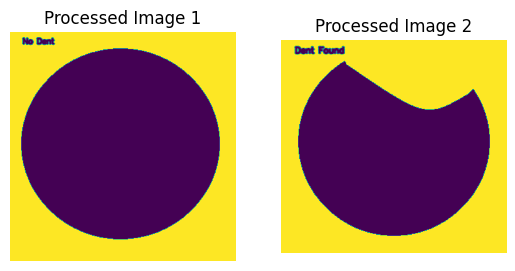

In [48]:
import cv2 as cv
import matplotlib.pyplot as plt
import math
import numpy as np

# Function to load and threshold the image
def load_and_threshold(image_path):
    img = cv.imread(image_path, 0)  # Load image in grayscale
    _, thresholded = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
    return img, thresholded

# Function to find and draw contours
def find_and_draw_contours(image, thresholded_image):
    contours, _ = cv.findContours(thresholded_image, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    cv.drawContours(image, contours, -1, (0, 255, 0), 3)  # Draw contours in green
    return contours

# Function to calculate the angle between two points
def calculate_angle(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    delta_y = y2 - y1
    delta_x = x2 - x1
    angle_rad = math.atan2(delta_y, delta_x)
    angle_deg = math.degrees(angle_rad)
    return angle_deg

# Function to count significant angle changes along a contour
def angle_graph(contour, threshold=30):
    prev_angle = 0
    angle_changes = 0

    for i in range(len(contour) - 1):
        angle = calculate_angle(contour[i], contour[i + 1])
        if abs(angle - prev_angle) > threshold:
            angle_changes += 1
        prev_angle = angle

    return angle_changes

# Function to find the contour with the maximum area
def find_max_contour(contours, min_area=500):
    max_area = 0
    max_contour = None

    for contour in contours:
        area = cv.contourArea(contour)
        if area > max_area and area > min_area:
            max_area = area
            max_contour = contour

    return max_contour, max_area

# Function to add text to the image
def add_text_to_image(image, text, position=(20, 20), font=cv.FONT_HERSHEY_SIMPLEX,
                      font_scale=0.4, color=(0, 255, 0), thickness=2, line_type=cv.LINE_AA):
    cv.putText(image, text, position, font, font_scale, color, thickness, line_type)

# Main function to process the images and contours
def process_images(img1_path, img2_path):
    # Load and threshold images
    img1, thr1 = load_and_threshold(img1_path)
    img2, thr2 = load_and_threshold(img2_path)

    # Find and draw contours
    contours1 = find_and_draw_contours(img1, thr1)
    contours2 = find_and_draw_contours(img2, thr2)

    # Find the max contour and calculate significant angle changes for img1
    max_contour1, max_area1 = find_max_contour(contours1)
    if max_contour1 is not None:
        print(f"Image 1 - Maximum Area: {max_area1}")
        angle_changes1 = angle_graph(max_contour1[:, 0][::2])  # Downsampling the contour points

        # Add appropriate text to img1
        if angle_changes1 <= 1:
            add_text_to_image(img1, "No Dent")
        else:
            add_text_to_image(img1, "Dent Found")

    # Find the max contour and calculate significant angle changes for img2
    max_contour2, max_area2 = find_max_contour(contours2)
    if max_contour2 is not None:
        print(f"Image 2 - Maximum Area: {max_area2}")
        angle_changes2 = angle_graph(max_contour2[:, 0][::2])  # Downsampling the contour points

        # Add appropriate text to img2
        if angle_changes2 <= 1:
            add_text_to_image(img2, "No Dent")
        else:
            add_text_to_image(img2, "Dent Found")

    # Show the processed images with contours and text
    plt.subplot(1, 2, 1)  # Display both images side by side
    plt.imshow(img1)
    plt.title("Processed Image 1")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img2)
    plt.title("Processed Image 2")
    plt.axis('off')

    plt.show()

# Call the main function with paths to the images
process_images("Q1.png", "Q2.png")
